# Robyn: Marketing Mix Modeling Application

This notebook demonstrates the usage of Robyn, a Marketing Mix Modeling (MMM) application. We'll go through the main steps of initializing the model, running it, and performing budget allocation.



## 1. Import Required Libraries and Create Synthetic Data

First, let's import the necessary libraries and create some synthetic data for our demonstration.

In [1]:
import pandas as pd
import numpy as np
import sys

from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.calibration_input import CalibrationInput, ChannelCalibrationData
from robyn.data.entities.enums import AdstockType, DependentVarType, CalibrationScope
from robyn.robyn import Robyn

/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1 Load simulated data.

You need to replace this with real data.

In [2]:
# Read the simulated data and holidays data
dt_simulated_weekly = pd.read_csv("resources/dt_simulated_weekly.csv")

print("Simulated Data...")
dt_simulated_weekly.head()

Simulated Data...


,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,22358.346667,0.0,12728.488889,2.430128e+07,0.000000,0.000000,8125009,7607.132915,na,19401.653846
1,2015-11-30,2.584277e+06,28613.453333,0.0,0.000000,5.527033e+06,9837.238486,4133.333333,7901549,1141.952450,na,14791.000000
2,2015-12-07,2.547387e+06,0.000000,132278.4,453.866667,1.665159e+07,12044.119653,3786.666667,8300197,4256.375378,na,14544.000000
3,2015-12-14,2.875220e+06,83450.306667,0.0,17680.000000,1.054977e+07,12268.070319,4253.333333,8122883,2800.490677,na,2800.000000
4,2015-12-21,2.215953e+06,0.000000,277336.0,0.000000,2.934090e+06,9467.248023,3613.333333,7105985,689.582605,na,15478.000000


In [3]:
dt_prophet_holidays = pd.read_csv("resources/dt_prophet_holidays.csv")

print("Holidays Data...")
dt_prophet_holidays.head()

Holidays Data...


,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


## 2.2. Initialize Robyn

Now, let's initialize Robyn with our synthetic data and configuration.

In [4]:
# Initialize Robyn
robyn = Robyn(working_dir="~/temp/robyn")

# Create MMMData
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var="revenue",
    dep_var_type="revenue",
    date_var="DATE",
    context_vars=["competitor_sales_B", "events"],
    paid_media_spends=["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    paid_media_vars=["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    organic_vars=["newsletter"],
    window_start="2016-01-01",
    window_end="2018-12-31",
)

mmm_data = MMMData(data=dt_simulated_weekly, mmmdata_spec=mmm_data_spec)

# Create HolidaysData (using dummy data for demonstration)
holidays_data = HolidaysData(
    dt_holidays=dt_prophet_holidays,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="DE",
    prophet_signs=["default", "default", "default"],
)

# Create Hyperparameters
hyperparameters = Hyperparameters(
    {
        "facebook_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "print_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "tv_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "search_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "ooh_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "newsletter": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
    },
    adstock=AdstockType.GEOMETRIC,
    lambda_=0.0,
    train_size=[0.5, 0.8],
)

# Create CalibrationInput (using dummy data for demonstration)
# calibration_input = CalibrationInput({
#     "tv_spend": ChannelCalibrationData(
#         lift_start_date=pd.Timestamp("2022-03-01"),
#         lift_end_date=pd.Timestamp("2022-03-15"),
#         lift_abs=10000,
#         spend=50000,
#         confidence=0.9,
#         metric="revenue",
#         calibration_scope=CalibrationScope.IMMEDIATE
#     )
# })

# Initialize Robyn
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
    calibration_input=None,
)

print("Robyn initialized successfully!")

2024-10-31 16:06:57 - root - INFO - Robyn initialized with working directory: ~/temp/robyn


Validation complete
Robyn initialized successfully!


## 3. Run Robyn Model

After initialization, we can run the Robyn model.

16:06:57 - cmdstanpy - INFO - Chain [1] start processing
2024-10-31 16:06:57 - cmdstanpy - INFO - Chain [1] start processing
16:06:58 - cmdstanpy - INFO - Chain [1] done processing
2024-10-31 16:06:58 - cmdstanpy - INFO - Chain [1] done processing
2024-10-31 16:06:58 - robyn.modeling.feature_engineering - INFO - Prophet decomposition complete.
2024-10-31 16:06:58 - robyn.modeling.feature_engineering - INFO - Processing tv_S
2024-10-31 16:06:58 - robyn.modeling.feature_engineering - INFO - Processing ooh_S
2024-10-31 16:06:59 - robyn.modeling.feature_engineering - INFO - Processing print_S
2024-10-31 16:07:01 - robyn.modeling.feature_engineering - INFO - Processing facebook_S
2024-10-31 16:07:01 - robyn.modeling.feature_engineering - INFO - Processing search_S
2024-10-31 16:07:01 - robyn.modeling.feature_engineering - INFO - Feature engineering complete.
/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/robyn/modeling/feature_engineering.py:129: FutureWarning: DataFrame.fillna wi

>>> Starting 5 trials with 2000 iterations each using TwoPointsDE nevergrad algorithm on x cores...


Running trial 1 of total 5 trials: 100%|███████████████████████████████████
2024-10-31 16:08:56 - robyn.modeling.ridge_model_builder - INFO -  Finished in 1.92 mins
Running trial 2 of total 5 trials: 100%|███████████████████████████████████
2024-10-31 16:10:58 - robyn.modeling.ridge_model_builder - INFO -  Finished in 2.03 mins
Running trial 3 of total 5 trials: 100%|███████████████████████████████████
2024-10-31 16:13:06 - robyn.modeling.ridge_model_builder - INFO -  Finished in 2.12 mins
Running trial 4 of total 5 trials: 100%|███████████████████████████████████
2024-10-31 16:15:09 - robyn.modeling.ridge_model_builder - INFO -  Finished in 2.03 mins
Running trial 5 of total 5 trials: 100%|███████████████████████████████████
2024-10-31 16:17:10 - robyn.modeling.ridge_model_builder - INFO -  Finished in 2.02 mins
2024-10-31 16:17:11 - robyn.modeling.convergence.convergence - WARNING - 'mape' column not found or all zeros. Assuming model is not calibrated.
2024-10-31 16:17:11 - matplotl

ModelOutputs(trials=[Trial(result_hyp_param=      facebook_S_thetas  facebook_S_alphas  facebook_S_gammas  print_S_thetas  \
0              0.035681           2.833923           0.746177        0.249050   
1              0.161493           2.565600           0.795389        0.297412   
2              0.125915           0.787896           0.465284        0.168545   
3              0.140057           1.789706           0.554511        0.341268   
4              0.182135           2.246835           0.966030        0.197701   
...                 ...                ...                ...             ...   
1995           0.056809           2.926015           0.831802        0.399668   
1996           0.094649           2.938623           0.904637        0.399777   
1997           0.031871           2.921443           0.814606        0.399791   
1998           0.107611           2.958015           0.861325        0.399567   
1999           0.107287           2.937371           0.919084    

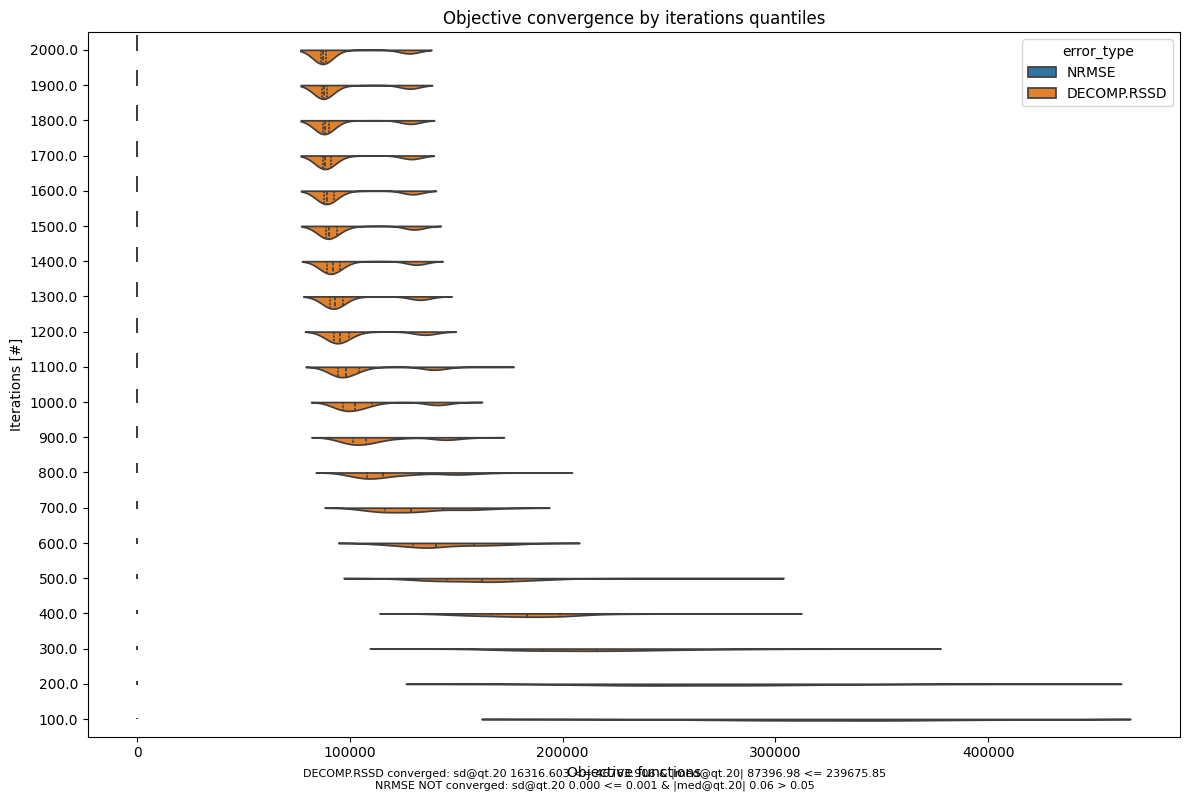

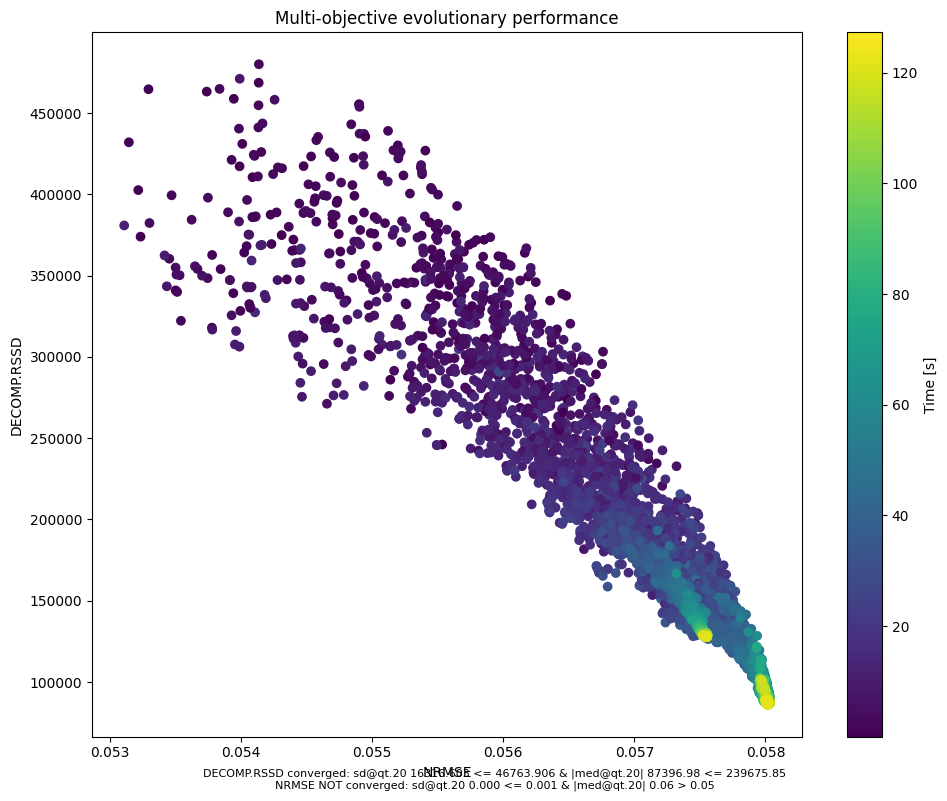

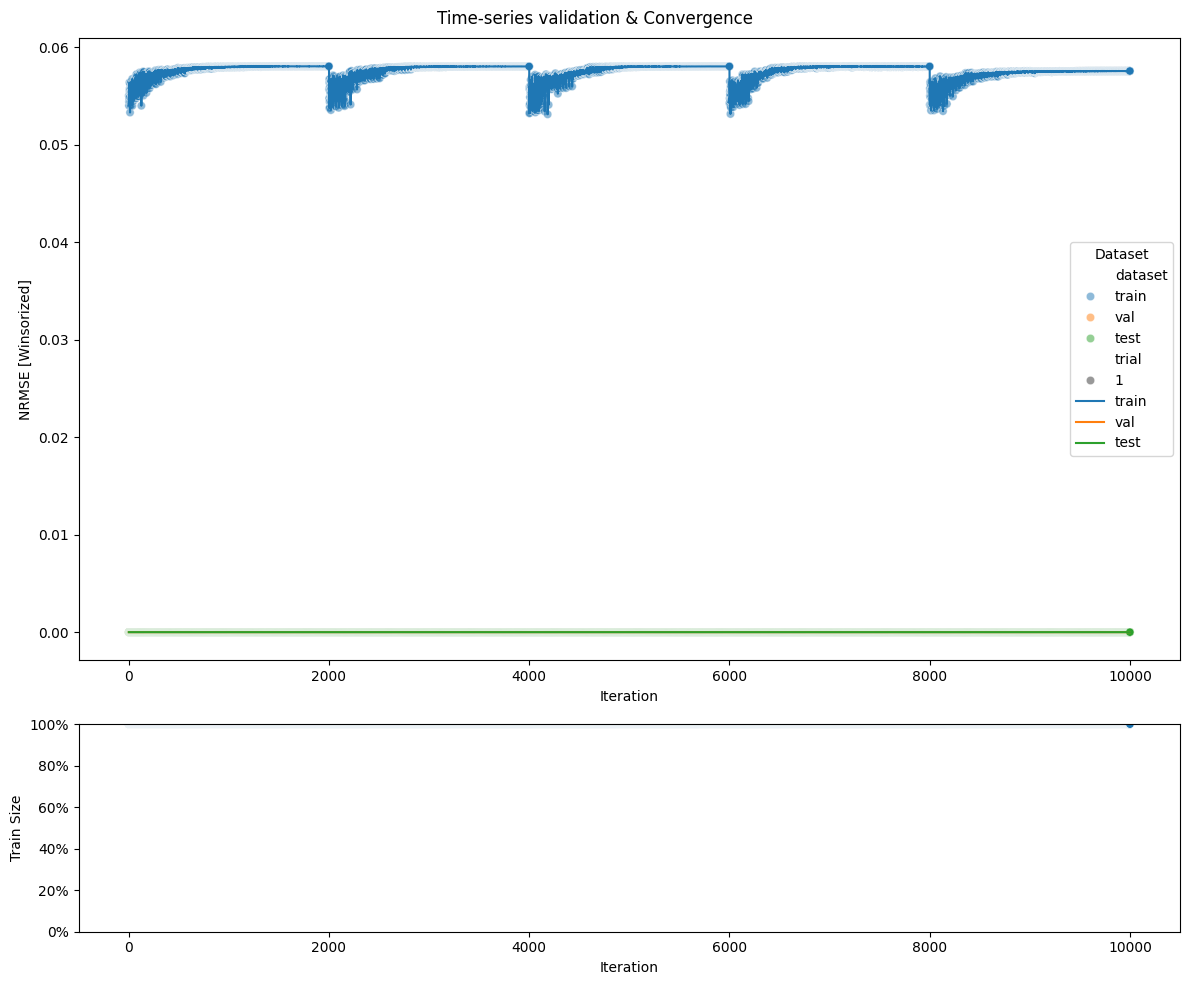

In [5]:
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig


trials_config = TrialsConfig(iterations=2000, trials=5)

# Run the model
robyn.model_run(feature_plots=False, trials_config=trials_config)

## 4. Pareto Calculation

In [6]:
# Test Pareto Optimizer

import pandas as pd
import json
from typing import Dict, Any, List
import numpy as np
from datetime import datetime, timedelta
from robyn.data.entities.mmmdata import MMMData
from robyn.modeling.entities.modeloutputs import ModelOutputs, Trial
from robyn.modeling.pareto.pareto_optimizer import ParetoOptimizer, ParetoData
from robyn.data.entities.enums import DependentVarType, PaidMediaSigns, OrganicSigns, ContextSigns

from utils.data_mapper import import_data, load_data_from_json


# 3. Create ParetoOptimizer instance
pareto_optimizer = ParetoOptimizer(mmm_data, model_outputs, hyperparameters, featurized_mmm_data, holidays_data)

ImportError: cannot import name 'import_data' from 'utils.data_mapper' (/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/tutorials/utils/data_mapper.py)

## 4. Budget Allocation

Finally, let's perform budget allocation using the trained model.

This notebook demonstrates the basic workflow of using Robyn for Marketing Mix Modeling. In a real-world scenario, you would need to replace the synthetic data with your actual marketing data and adjust the parameters accordingly.

Remember to explore the full capabilities of Robyn, including model evaluation, visualization, and interpretation of results, which are beyond the scope of this basic demonstration.